In [29]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
import tempfile
import seaborn as sns
sns.set(style="darkgrid")
import random

import logging
logging.getLogger().setLevel(logging.INFO)

from banditpylib import trials_to_dataframe
from banditpylib.arms import BernoulliArm, GaussianArm
from banditpylib.bandits import MultiArmedBandit
from banditpylib.protocols import SinglePlayerProtocol
from banditpylib.learners.mab_learner import UCB, EpsGreedy, ThompsonSampling, ExploreThenCommit

### Bernoulli Arms

In [63]:
horizon = 2000
means = np.array([0.3, 0.65, 0.7])
arms = [BernoulliArm(mean) for mean in means]
bandit = MultiArmedBandit(arms=arms)
learners = [ExploreThenCommit(arm_num=len(arms), T_prime=500, name='Explore Then Commit'),
            EpsGreedy(arm_num=len(arms), name='Epsilon Greedy'), 
            UCB(arm_num=len(arms), name='UCB'),
            ThompsonSampling(arm_num=len(arms), name='Thompson Sampling')]
# Report intermediate regrets after these horizons
intermediate_horizons = list(range(0, horizon+1, 50))
temp_file = tempfile.NamedTemporaryFile()

In [64]:
game = SinglePlayerProtocol(bandit, learners)
# Start playing the game
# Add `debug=True` for debugging purpose
game.play(200, temp_file.name, intermediate_horizons=intermediate_horizons, horizon=horizon, debug=True)

INFO:absl:start Explore Then Commit's play with multi_armed_bandit
INFO:absl:Explore Then Commit's play with multi_armed_bandit runs 1.06 seconds.
INFO:absl:start Epsilon Greedy's play with multi_armed_bandit
INFO:absl:Epsilon Greedy's play with multi_armed_bandit runs 1.07 seconds.
INFO:absl:start UCB's play with multi_armed_bandit
INFO:absl:UCB's play with multi_armed_bandit runs 1.29 seconds.
INFO:absl:start Thompson Sampling's play with multi_armed_bandit
INFO:absl:Thompson Sampling's play with multi_armed_bandit runs 1.10 seconds.


In [65]:
trials_df = trials_to_dataframe(temp_file.name)
trials_df.head()

,rounds,total_actions,regret,other,bandit,learner
0,0,0,0.0,0.0,multi_armed_bandit,Explore Then Commit
1,50,50,6.0,0.0,multi_armed_bandit,Explore Then Commit
2,100,100,11.0,0.0,multi_armed_bandit,Explore Then Commit
3,150,150,20.0,0.0,multi_armed_bandit,Explore Then Commit
4,200,200,30.0,0.0,multi_armed_bandit,Explore Then Commit


<Axes: xlabel='total_actions', ylabel='regret'>

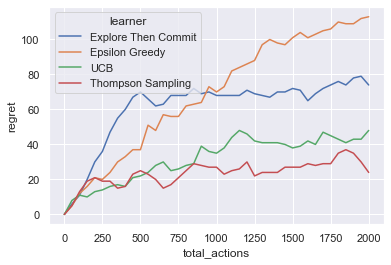

In [66]:
sns.lineplot(x='total_actions', y='regret', hue='learner', data=trials_df)

### Gaussian Arms

In [92]:
ThompsonSampling?

In [125]:
horizon = 3000

means = [((i/5)**0.5)*10 for i in range(1,5)]
random.shuffle(means)
print(means)

arms = [GaussianArm(mu=mean, std=1) for mean in means]
bandit = MultiArmedBandit(arms=arms)
learners = [ExploreThenCommit(arm_num=len(arms), T_prime=100, name='Explore Then Commit'),
            EpsGreedy(arm_num=len(arms), name='Epsilon Greedy'), 
            UCB(arm_num=len(arms), name='UCB'),
            ThompsonSampling(arm_num=len(arms), prior_dist='gaussian', name='Thompson Sampling')]
# Report intermediate regrets after these horizons
intermediate_horizons = list(range(0, horizon+1, 50))
temp_file = tempfile.NamedTemporaryFile()

[4.47213595499958, 7.745966692414834, 8.94427190999916, 6.324555320336759]


In [126]:
game = SinglePlayerProtocol(bandit, learners)
# Start playing the game
# Add `debug=True` for debugging purpose
game.play(200, temp_file.name, intermediate_horizons=intermediate_horizons, horizon=horizon, debug=True)

INFO:absl:start Explore Then Commit's play with multi_armed_bandit
INFO:absl:Explore Then Commit's play with multi_armed_bandit runs 1.06 seconds.
INFO:absl:start Epsilon Greedy's play with multi_armed_bandit
INFO:absl:Epsilon Greedy's play with multi_armed_bandit runs 1.01 seconds.
INFO:absl:start UCB's play with multi_armed_bandit
INFO:absl:UCB's play with multi_armed_bandit runs 0.96 seconds.
INFO:absl:start Thompson Sampling's play with multi_armed_bandit
INFO:absl:Thompson Sampling's play with multi_armed_bandit runs 1.09 seconds.


In [127]:
trials_df = trials_to_dataframe(temp_file.name)
trials_df.tail()

,rounds,total_actions,regret,other,bandit,learner
239,2800,2800,6.397501,0.0,multi_armed_bandit,Thompson Sampling
240,2850,2850,11.716328,0.0,multi_armed_bandit,Thompson Sampling
241,2900,2900,13.355135,0.0,multi_armed_bandit,Thompson Sampling
242,2950,2950,14.093944,0.0,multi_armed_bandit,Thompson Sampling
243,3000,3000,23.370186,0.0,multi_armed_bandit,Thompson Sampling


<Axes: xlabel='total_actions', ylabel='regret'>

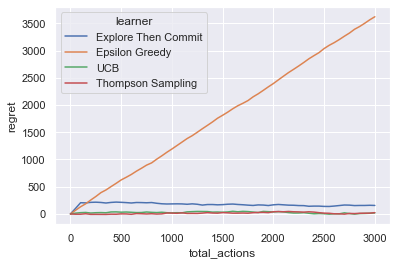

In [128]:
sns.lineplot(x='total_actions', y='regret', hue='learner', data=trials_df)